# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pycaret
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from pycaret.regression import *
from datetime import date, time 
from datetime import datetime, timedelta

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import sys

# Import Data from CSV

In [3]:
df = pd.read_csv("SeoulBikeData.csv", encoding= 'unicode_escape')

In [4]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

# Check Value counts for attributes

In [5]:
print(df['Functioning Day'].value_counts())

Yes    8465
No      295
Name: Functioning Day, dtype: int64


In [6]:
print(df['Holiday'].value_counts())

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


In [7]:
print(df['Seasons'].value_counts())

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64


# Rename columns to remove special characters of units

In [8]:
df_columns = ["Date", "Rented Bike Count", "Hour", "Temperature", "Humidity", "Wind speed", "Visibility", 
              "Dew point temperature", "Solar radiation", "Rainfall", "Snowfall", "Seasons", "Holiday", "Functioning Day"]

In [9]:
df.columns = df_columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

# Check missing values

In [11]:
df.isna().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

# Check Correlation

In [12]:
df.corr()

Rented Bike Count      Hour  Temperature  Humidity  \
Rented Bike Count               1.000000  0.410257     0.538558 -0.199780   
Hour                            0.410257  1.000000     0.124114 -0.241644   
Temperature                     0.538558  0.124114     1.000000  0.159371   
Humidity                       -0.199780 -0.241644     0.159371  1.000000   
Wind speed                      0.121108  0.285197    -0.036252 -0.336683   
Visibility                      0.199280  0.098753     0.034794 -0.543090   
Dew point temperature           0.379788  0.003054     0.912798  0.536894   
Solar radiation                 0.261837  0.145131     0.353505 -0.461919   
Rainfall                       -0.123074  0.008715     0.050282  0.236397   
Snowfall                       -0.141804 -0.021516    -0.218405  0.108183   

                       Wind speed  Visibility  Dew point temperature  \
Rented Bike Count        0.121108    0.199280               0.379788   
Hour                     0.285197    0.098753               0.003054   
Temperature             -0.036252    0.034794               0.912798   
Humidity                -0.336683   -0.543090               0.536894   
Wind speed               1.000000    0.171507              -0.176486   
Visibility               0.171507    1.000000              -0.176630   
Dew point temperature   -0.176486   -0.176630               1.000000   
Solar radiation          0.332274    0.149738               0.094381   
Rainfall                -0.019674   -0.167629               0.125597   
Snowfall                -0.003554   -0.121695              -0.150887   

                       Solar radiation  Rainfall  Snowfall  
Rented Bike Count             0.261837 -0.123074 -0.141804  
Hour                          0.145131  0.008715 -0.021516  
Temperature                   0.353505  0.050282 -0.218405  
Humidity                     -0.461919  0.236397  0.108183  
Wind speed                    0.332274 -0.019674 -0.003554  
Visibility                    0.149738 -0.167629 -0.121695  
Dew point temperature         0.094381  0.125597 -0.150887  
Solar radiation               1.000000 -0.074290 -0.072301  
Rainfall                     -0.074290  1.000000  0.008500  
Snowfall                     -0.072301  0.008500  1.000000

<AxesSubplot:>

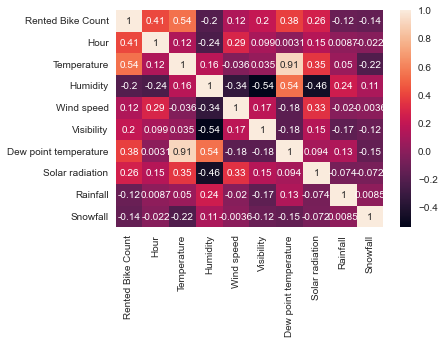

In [13]:
sns.heatmap(df.corr(), annot = True)

# Change "Seasons", "Holiday", and "Functioning Day" to numerical variables

In [14]:
encoded_df = pd.get_dummies(df, columns = ["Seasons", "Holiday", "Functioning Day"], drop_first = True)
encoded_df

Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0     01/12/2017                254     0         -5.2        37         2.2   
1     01/12/2017                204     1         -5.5        38         0.8   
2     01/12/2017                173     2         -6.0        39         1.0   
3     01/12/2017                107     3         -6.2        40         0.9   
4     01/12/2017                 78     4         -6.0        36         2.3   
...          ...                ...   ...          ...       ...         ...   
8755  30/11/2018               1003    19          4.2        34         2.6   
8756  30/11/2018                764    20          3.4        37         2.3   
8757  30/11/2018                694    21          2.6        39         0.3   
8758  30/11/2018                712    22          2.1        41         1.0   
8759  30/11/2018                584    23          1.9        43         1.3   

      Visibility  Dew point temperature  Solar radiation  Rainfall  Snowfall  \
0           2000                  -17.6              0.0       0.0       0.0   
1           2000                  -17.6              0.0       0.0       0.0   
2           2000                  -17.7              0.0       0.0       0.0   
3           2000                  -17.6              0.0       0.0       0.0   
4           2000                  -18.6              0.0       0.0       0.0   
...          ...                    ...              ...       ...       ...   
8755        1894                  -10.3              0.0       0.0       0.0   
8756        2000                   -9.9              0.0       0.0       0.0   
8757        1968                   -9.9              0.0       0.0       0.0   
8758        1859                   -9.8              0.0       0.0       0.0   
8759        1909                   -9.3              0.0       0.0       0.0   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8760 rows x 16 columns]

# Move column "Rented Bike Count" to the last column

In [15]:
column_to_move = encoded_df.pop('Rented Bike Count')
encoded_df['Rented Bike Count'] = column_to_move
encoded_df

Date  Hour  Temperature  Humidity  Wind speed  Visibility  \
0     01/12/2017     0         -5.2        37         2.2        2000   
1     01/12/2017     1         -5.5        38         0.8        2000   
2     01/12/2017     2         -6.0        39         1.0        2000   
3     01/12/2017     3         -6.2        40         0.9        2000   
4     01/12/2017     4         -6.0        36         2.3        2000   
...          ...   ...          ...       ...         ...         ...   
8755  30/11/2018    19          4.2        34         2.6        1894   
8756  30/11/2018    20          3.4        37         2.3        2000   
8757  30/11/2018    21          2.6        39         0.3        1968   
8758  30/11/2018    22          2.1        41         1.0        1859   
8759  30/11/2018    23          1.9        43         1.3        1909   

      Dew point temperature  Solar radiation  Rainfall  Snowfall  \
0                     -17.6              0.0       0.0       0.0   
1                     -17.6              0.0       0.0       0.0   
2                     -17.7              0.0       0.0       0.0   
3                     -17.6              0.0       0.0       0.0   
4                     -18.6              0.0       0.0       0.0   
...                     ...              ...       ...       ...   
8755                  -10.3              0.0       0.0       0.0   
8756                   -9.9              0.0       0.0       0.0   
8757                   -9.9              0.0       0.0       0.0   
8758                   -9.8              0.0       0.0       0.0   
8759                   -9.3              0.0       0.0       0.0   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  Rented Bike Count  
0                       1                254  
1                       1                204  
2                       1                173  
3                       1                107  
4                       1                 78  
...                   ...                ...  
8755                    1               1003  
8756                    1                764  
8757                    1                694  
8758                    1                712  
8759                    1                584  

[8760 rows x 16 columns]

## Dropping 'Date' column for Pycaret Machine Learning 

In [16]:
encoded_df.drop('Date', axis = 1, inplace = True)

In [17]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hour                   8760 non-null   int64  
 1   Temperature            8760 non-null   float64
 2   Humidity               8760 non-null   int64  
 3   Wind speed             8760 non-null   float64
 4   Visibility             8760 non-null   int64  
 5   Dew point temperature  8760 non-null   float64
 6   Solar radiation        8760 non-null   float64
 7   Rainfall               8760 non-null   float64
 8   Snowfall               8760 non-null   float64
 9   Seasons_Spring         8760 non-null   uint8  
 10  Seasons_Summer         8760 non-null   uint8  
 11  Seasons_Winter         8760 non-null   uint8  
 12  Holiday_No Holiday     8760 non-null   uint8  
 13  Functioning Day_Yes    8760 non-null   uint8  
 14  Rented Bike Count      8760 non-null   int64  
dtypes: f

# PyCaret

## Setting up the PyCaret environment

In [18]:
reg = setup(data = encoded_df, 
             target = 'Rented Bike Count',
             numeric_imputation = 'mean',
             normalize = True)

## Comparing models

In [19]:
compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

# Top 2 Model for Machine Learning - LIGHT GBM & CatBoost

## Create model - Light GBM

In [20]:
lgb = create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tune Light GBM model

In [21]:
tuned_lgb = tune_model(lgb)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
print(tuned_lgb)

LGBMRegressor(random_state=8945)


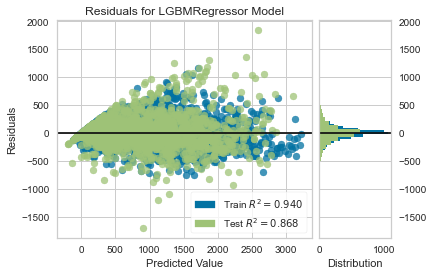

In [23]:
plot_model(tuned_lgb)

In [24]:
evaluate_model(tuned_lgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

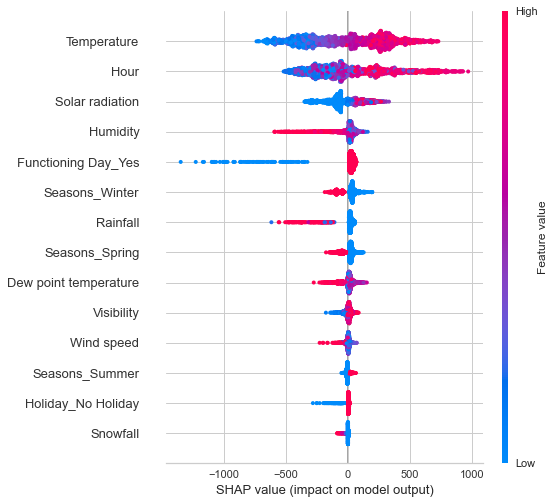

In [25]:
interpret_model(tuned_lgb)

## Predicting on test sample

In [26]:
predict_model(tuned_lgb)

Hour  Temperature  Humidity  Wind speed  Visibility  \
6132  1.230304     0.017551 -0.834789    0.551297   -0.446949   
6133 -0.505464    -0.007367  0.443910   -1.081404   -1.736880   
6134  0.796362    -1.942652 -0.982331    1.703792    0.925038   
6135  1.085657    -1.560579 -1.326596    1.799834    0.925038   
6136 -0.216169     0.715250  1.329162   -0.601198   -1.379113   
...        ...          ...       ...         ...         ...   
8755  0.217773     0.258423 -0.490524    0.935462   -1.474299   
8756 -0.360816    -0.779820 -1.031512    1.799834    0.380182   
8757  0.073126     0.383012 -1.228235   -0.601198    0.925038   
8758  1.664246     0.565743 -0.146259   -0.313074    0.925038   
8759 -0.505464     1.280054  0.493090   -0.409115    0.925038   

      Dew point temperature  Solar radiation  Rainfall  Snowfall  \
6132              -0.297926        -0.657322 -0.128951 -0.180770   
6133               0.210982         0.322441 -0.128951 -0.180770   
6134              -1.984159        -0.224403 -0.128951  1.920396   
6135              -1.847437        -0.657322 -0.128951 -0.180770   
6136               1.122459         0.869285 -0.128951 -0.180770   
...                     ...              ...       ...       ...   
8755               0.066665         1.473092 -0.128951 -0.180770   
8756              -1.049894         0.561685 -0.128951 -0.180770   
8757              -0.229565         2.065506 -0.128951 -0.180770   
8758               0.484425        -0.657322 -0.128951 -0.180770   
8759               1.350329        -0.190226 -0.128951 -0.180770   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
6132        1.726046       -0.582121       -0.581619            0.235418   
6133        1.726046       -0.582121       -0.581619            0.235418   
6134       -0.579359       -0.582121        1.719340            0.235418   
6135       -0.579359       -0.582121        1.719340            0.235418   
6136       -0.579359        1.717856       -0.581619            0.235418   
...              ...             ...             ...                 ...   
8755       -0.579359       -0.582121       -0.581619            0.235418   
8756        1.726046       -0.582121       -0.581619            0.235418   
8757       -0.579359       -0.582121       -0.581619            0.235418   
8758       -0.579359        1.717856       -0.581619            0.235418   
8759       -0.579359        1.717856       -0.581619            0.235418   

      Functioning Day_Yes  Rented Bike Count  prediction_label  
6132             0.188311               1346       1155.039315  
6133             0.188311                647       1394.259761  
6134             0.188311                239        201.387267  
6135             0.188311                134        252.926706  
6136             0.188311                862        782.388972  
...                   ...                ...               ...  
8755             0.188311               1094        820.363341  
8756             0.188311                426        551.965827  
8757             0.188311               1161       1191.329965  
8758             0.188311               1593       1332.346201  
8759             0.188311               1660       1543.554469  

[2628 rows x 16 columns]

## Finalising the model, fitting the model on the complete dataset

In [27]:
final_lgb = finalize_model(tuned_lgb)
print(final_lgb)

Pipeline(memory=Memory(location=C:\Users\vivio\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Hour', 'Temperature', 'Humidity',
                                             'Wind speed', 'Visibility',
                                             'Dew point temperature',
                                             'Solar radiation', 'Rainfall',
                                             'Snowfall', 'Seasons_Spring',
                                             'Seasons_Summer', 'Seasons_Winter',
                                             'Holiday_No Holiday',
                                             'Functioning Day_Yes'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(t

In [28]:
predict_model(final_lgb)

Hour  Temperature  Humidity  Wind speed  Visibility  \
6132  1.230304     0.017551 -0.834789    0.551297   -0.446949   
6133 -0.505464    -0.007367  0.443910   -1.081404   -1.736880   
6134  0.796362    -1.942652 -0.982331    1.703792    0.925038   
6135  1.085657    -1.560579 -1.326596    1.799834    0.925038   
6136 -0.216169     0.715250  1.329162   -0.601198   -1.379113   
...        ...          ...       ...         ...         ...   
8755  0.217773     0.258423 -0.490524    0.935462   -1.474299   
8756 -0.360816    -0.779820 -1.031512    1.799834    0.380182   
8757  0.073126     0.383012 -1.228235   -0.601198    0.925038   
8758  1.664246     0.565743 -0.146259   -0.313074    0.925038   
8759 -0.505464     1.280054  0.493090   -0.409115    0.925038   

      Dew point temperature  Solar radiation  Rainfall  Snowfall  \
6132              -0.297926        -0.657322 -0.128951 -0.180770   
6133               0.210982         0.322441 -0.128951 -0.180770   
6134              -1.984159        -0.224403 -0.128951  1.920396   
6135              -1.847437        -0.657322 -0.128951 -0.180770   
6136               1.122459         0.869285 -0.128951 -0.180770   
...                     ...              ...       ...       ...   
8755               0.066665         1.473092 -0.128951 -0.180770   
8756              -1.049894         0.561685 -0.128951 -0.180770   
8757              -0.229565         2.065506 -0.128951 -0.180770   
8758               0.484425        -0.657322 -0.128951 -0.180770   
8759               1.350329        -0.190226 -0.128951 -0.180770   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
6132        1.726046       -0.582121       -0.581619            0.235418   
6133        1.726046       -0.582121       -0.581619            0.235418   
6134       -0.579359       -0.582121        1.719340            0.235418   
6135       -0.579359       -0.582121        1.719340            0.235418   
6136       -0.579359        1.717856       -0.581619            0.235418   
...              ...             ...             ...                 ...   
8755       -0.579359       -0.582121       -0.581619            0.235418   
8756        1.726046       -0.582121       -0.581619            0.235418   
8757       -0.579359       -0.582121       -0.581619            0.235418   
8758       -0.579359        1.717856       -0.581619            0.235418   
8759       -0.579359        1.717856       -0.581619            0.235418   

      Functioning Day_Yes  Rented Bike Count  prediction_label  
6132             0.188311               1346       1260.482867  
6133             0.188311                647        937.475705  
6134             0.188311                239        212.872251  
6135             0.188311                134        247.816323  
6136             0.188311                862        844.200705  
...                   ...                ...               ...  
8755             0.188311               1094        921.033934  
8756             0.188311                426        515.296342  
8757             0.188311               1161       1219.018561  
8758             0.188311               1593       1347.593735  
8759             0.188311               1660       1676.138910  

[2628 rows x 16 columns]

## Create model - CatBoost

In [29]:
cat_boost = create_model('catboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tune CatBoost model

In [30]:
tuned_cat_boost = tune_model(cat_boost)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


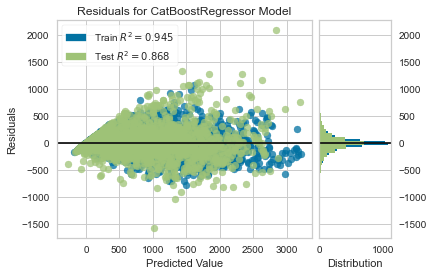

In [31]:
plot_model(tuned_cat_boost)

In [32]:
evaluate_model(tuned_cat_boost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

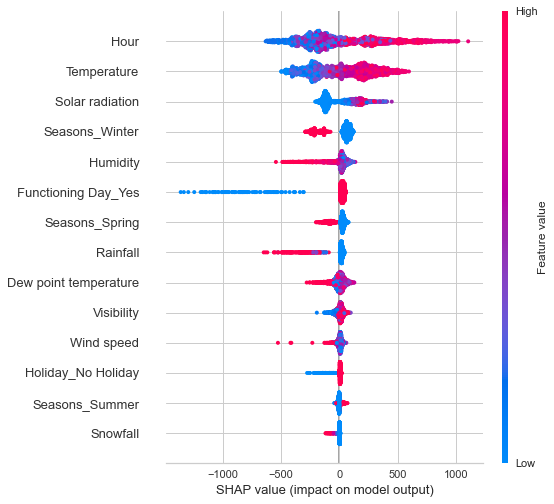

In [33]:
interpret_model(tuned_cat_boost)

## Predicting on test sample

In [34]:
predict_model(tuned_cat_boost)

Hour  Temperature  Humidity  Wind speed  Visibility  \
6132  1.230304     0.017551 -0.834789    0.551297   -0.446949   
6133 -0.505464    -0.007367  0.443910   -1.081404   -1.736880   
6134  0.796362    -1.942652 -0.982331    1.703792    0.925038   
6135  1.085657    -1.560579 -1.326596    1.799834    0.925038   
6136 -0.216169     0.715250  1.329162   -0.601198   -1.379113   
...        ...          ...       ...         ...         ...   
8755  0.217773     0.258423 -0.490524    0.935462   -1.474299   
8756 -0.360816    -0.779820 -1.031512    1.799834    0.380182   
8757  0.073126     0.383012 -1.228235   -0.601198    0.925038   
8758  1.664246     0.565743 -0.146259   -0.313074    0.925038   
8759 -0.505464     1.280054  0.493090   -0.409115    0.925038   

      Dew point temperature  Solar radiation  Rainfall  Snowfall  \
6132              -0.297926        -0.657322 -0.128951 -0.180770   
6133               0.210982         0.322441 -0.128951 -0.180770   
6134              -1.984159        -0.224403 -0.128951  1.920396   
6135              -1.847437        -0.657322 -0.128951 -0.180770   
6136               1.122459         0.869285 -0.128951 -0.180770   
...                     ...              ...       ...       ...   
8755               0.066665         1.473092 -0.128951 -0.180770   
8756              -1.049894         0.561685 -0.128951 -0.180770   
8757              -0.229565         2.065506 -0.128951 -0.180770   
8758               0.484425        -0.657322 -0.128951 -0.180770   
8759               1.350329        -0.190226 -0.128951 -0.180770   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
6132        1.726046       -0.582121       -0.581619            0.235418   
6133        1.726046       -0.582121       -0.581619            0.235418   
6134       -0.579359       -0.582121        1.719340            0.235418   
6135       -0.579359       -0.582121        1.719340            0.235418   
6136       -0.579359        1.717856       -0.581619            0.235418   
...              ...             ...             ...                 ...   
8755       -0.579359       -0.582121       -0.581619            0.235418   
8756        1.726046       -0.582121       -0.581619            0.235418   
8757       -0.579359       -0.582121       -0.581619            0.235418   
8758       -0.579359        1.717856       -0.581619            0.235418   
8759       -0.579359        1.717856       -0.581619            0.235418   

      Functioning Day_Yes  Rented Bike Count  prediction_label  
6132             0.188311               1346       1103.191801  
6133             0.188311                647       1504.397268  
6134             0.188311                239        214.183892  
6135             0.188311                134        227.353417  
6136             0.188311                862        823.464421  
...                   ...                ...               ...  
8755             0.188311               1094        917.335969  
8756             0.188311                426        542.401566  
8757             0.188311               1161       1179.322761  
8758             0.188311               1593       1414.734365  
8759             0.188311               1660       1384.097889  

[2628 rows x 16 columns]

## Finalising the model, fitting the model on the complete dataset

In [35]:
final_catboost = finalize_model(tuned_cat_boost)

In [36]:
predict_model(final_catboost)

Hour  Temperature  Humidity  Wind speed  Visibility  \
6132  1.230304     0.017551 -0.834789    0.551297   -0.446949   
6133 -0.505464    -0.007367  0.443910   -1.081404   -1.736880   
6134  0.796362    -1.942652 -0.982331    1.703792    0.925038   
6135  1.085657    -1.560579 -1.326596    1.799834    0.925038   
6136 -0.216169     0.715250  1.329162   -0.601198   -1.379113   
...        ...          ...       ...         ...         ...   
8755  0.217773     0.258423 -0.490524    0.935462   -1.474299   
8756 -0.360816    -0.779820 -1.031512    1.799834    0.380182   
8757  0.073126     0.383012 -1.228235   -0.601198    0.925038   
8758  1.664246     0.565743 -0.146259   -0.313074    0.925038   
8759 -0.505464     1.280054  0.493090   -0.409115    0.925038   

      Dew point temperature  Solar radiation  Rainfall  Snowfall  \
6132              -0.297926        -0.657322 -0.128951 -0.180770   
6133               0.210982         0.322441 -0.128951 -0.180770   
6134              -1.984159        -0.224403 -0.128951  1.920396   
6135              -1.847437        -0.657322 -0.128951 -0.180770   
6136               1.122459         0.869285 -0.128951 -0.180770   
...                     ...              ...       ...       ...   
8755               0.066665         1.473092 -0.128951 -0.180770   
8756              -1.049894         0.561685 -0.128951 -0.180770   
8757              -0.229565         2.065506 -0.128951 -0.180770   
8758               0.484425        -0.657322 -0.128951 -0.180770   
8759               1.350329        -0.190226 -0.128951 -0.180770   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
6132        1.726046       -0.582121       -0.581619            0.235418   
6133        1.726046       -0.582121       -0.581619            0.235418   
6134       -0.579359       -0.582121        1.719340            0.235418   
6135       -0.579359       -0.582121        1.719340            0.235418   
6136       -0.579359        1.717856       -0.581619            0.235418   
...              ...             ...             ...                 ...   
8755       -0.579359       -0.582121       -0.581619            0.235418   
8756        1.726046       -0.582121       -0.581619            0.235418   
8757       -0.579359       -0.582121       -0.581619            0.235418   
8758       -0.579359        1.717856       -0.581619            0.235418   
8759       -0.579359        1.717856       -0.581619            0.235418   

      Functioning Day_Yes  Rented Bike Count  prediction_label  
6132             0.188311               1346       1139.600329  
6133             0.188311                647       1035.843482  
6134             0.188311                239        200.142365  
6135             0.188311                134        242.854039  
6136             0.188311                862        813.372246  
...                   ...                ...               ...  
8755             0.188311               1094        961.321413  
8756             0.188311                426        557.317537  
8757             0.188311               1161       1239.838958  
8758             0.188311               1593       1395.855134  
8759             0.188311               1660       1599.868802  

[2628 rows x 16 columns]

# Adding 'Date' column back into encoded dataset for time series ML model

In [37]:
date = df['Date']

In [38]:
encoded_df = encoded_df.join(date)

In [39]:
encoded_df

Hour  Temperature  Humidity  Wind speed  Visibility  \
0        0         -5.2        37         2.2        2000   
1        1         -5.5        38         0.8        2000   
2        2         -6.0        39         1.0        2000   
3        3         -6.2        40         0.9        2000   
4        4         -6.0        36         2.3        2000   
...    ...          ...       ...         ...         ...   
8755    19          4.2        34         2.6        1894   
8756    20          3.4        37         2.3        2000   
8757    21          2.6        39         0.3        1968   
8758    22          2.1        41         1.0        1859   
8759    23          1.9        43         1.3        1909   

      Dew point temperature  Solar radiation  Rainfall  Snowfall  \
0                     -17.6              0.0       0.0       0.0   
1                     -17.6              0.0       0.0       0.0   
2                     -17.7              0.0       0.0       0.0   
3                     -17.6              0.0       0.0       0.0   
4                     -18.6              0.0       0.0       0.0   
...                     ...              ...       ...       ...   
8755                  -10.3              0.0       0.0       0.0   
8756                   -9.9              0.0       0.0       0.0   
8757                   -9.9              0.0       0.0       0.0   
8758                   -9.8              0.0       0.0       0.0   
8759                   -9.3              0.0       0.0       0.0   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  Rented Bike Count        Date  
0                       1                254  01/12/2017  
1                       1                204  01/12/2017  
2                       1                173  01/12/2017  
3                       1                107  01/12/2017  
4                       1                 78  01/12/2017  
...                   ...                ...         ...  
8755                    1               1003  30/11/2018  
8756                    1                764  30/11/2018  
8757                    1                694  30/11/2018  
8758                    1                712  30/11/2018  
8759                    1                584  30/11/2018  

[8760 rows x 16 columns]

# Combining 'Date' and 'Hour' columns into a new column

In [40]:
encoded_df['Timestamp'] = pd.to_datetime(encoded_df['Date']) + encoded_df['Hour'] * pd.to_timedelta('1H')
encoded_df

Hour  Temperature  Humidity  Wind speed  Visibility  \
0        0         -5.2        37         2.2        2000   
1        1         -5.5        38         0.8        2000   
2        2         -6.0        39         1.0        2000   
3        3         -6.2        40         0.9        2000   
4        4         -6.0        36         2.3        2000   
...    ...          ...       ...         ...         ...   
8755    19          4.2        34         2.6        1894   
8756    20          3.4        37         2.3        2000   
8757    21          2.6        39         0.3        1968   
8758    22          2.1        41         1.0        1859   
8759    23          1.9        43         1.3        1909   

      Dew point temperature  Solar radiation  Rainfall  Snowfall  \
0                     -17.6              0.0       0.0       0.0   
1                     -17.6              0.0       0.0       0.0   
2                     -17.7              0.0       0.0       0.0   
3                     -17.6              0.0       0.0       0.0   
4                     -18.6              0.0       0.0       0.0   
...                     ...              ...       ...       ...   
8755                  -10.3              0.0       0.0       0.0   
8756                   -9.9              0.0       0.0       0.0   
8757                   -9.9              0.0       0.0       0.0   
8758                   -9.8              0.0       0.0       0.0   
8759                   -9.3              0.0       0.0       0.0   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  Rented Bike Count        Date           Timestamp  
0                       1                254  01/12/2017 2017-01-12 00:00:00  
1                       1                204  01/12/2017 2017-01-12 01:00:00  
2                       1                173  01/12/2017 2017-01-12 02:00:00  
3                       1                107  01/12/2017 2017-01-12 03:00:00  
4                       1                 78  01/12/2017 2017-01-12 04:00:00  
...                   ...                ...         ...                 ...  
8755                    1               1003  30/11/2018 2018-11-30 19:00:00  
8756                    1                764  30/11/2018 2018-11-30 20:00:00  
8757                    1                694  30/11/2018 2018-11-30 21:00:00  
8758                    1                712  30/11/2018 2018-11-30 22:00:00  
8759                    1                584  30/11/2018 2018-11-30 23:00:00  

[8760 rows x 17 columns]

In [41]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Hour                   8760 non-null   int64         
 1   Temperature            8760 non-null   float64       
 2   Humidity               8760 non-null   int64         
 3   Wind speed             8760 non-null   float64       
 4   Visibility             8760 non-null   int64         
 5   Dew point temperature  8760 non-null   float64       
 6   Solar radiation        8760 non-null   float64       
 7   Rainfall               8760 non-null   float64       
 8   Snowfall               8760 non-null   float64       
 9   Seasons_Spring         8760 non-null   uint8         
 10  Seasons_Summer         8760 non-null   uint8         
 11  Seasons_Winter         8760 non-null   uint8         
 12  Holiday_No Holiday     8760 non-null   uint8         
 13  Fun

# Time Series Model - Prophet

## Import Prophet Libraries

In [42]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## Data processing for Prophet

### Prophet requires at least two columns as inputs: a ds column and a y column.
#### ds column has the time information - renaming 'Timestamp' as 'ds'.
#### y column has the time series values - renaming 'Rented Bike Count' as 'y'.

In [43]:
rename_encoded_df = encoded_df.rename(columns = {"Timestamp": 'ds',
                              "Rented Bike Count": 'y'})

In [44]:
rename_encoded_df

Hour  Temperature  Humidity  Wind speed  Visibility  \
0        0         -5.2        37         2.2        2000   
1        1         -5.5        38         0.8        2000   
2        2         -6.0        39         1.0        2000   
3        3         -6.2        40         0.9        2000   
4        4         -6.0        36         2.3        2000   
...    ...          ...       ...         ...         ...   
8755    19          4.2        34         2.6        1894   
8756    20          3.4        37         2.3        2000   
8757    21          2.6        39         0.3        1968   
8758    22          2.1        41         1.0        1859   
8759    23          1.9        43         1.3        1909   

      Dew point temperature  Solar radiation  Rainfall  Snowfall  \
0                     -17.6              0.0       0.0       0.0   
1                     -17.6              0.0       0.0       0.0   
2                     -17.7              0.0       0.0       0.0   
3                     -17.6              0.0       0.0       0.0   
4                     -18.6              0.0       0.0       0.0   
...                     ...              ...       ...       ...   
8755                  -10.3              0.0       0.0       0.0   
8756                   -9.9              0.0       0.0       0.0   
8757                   -9.9              0.0       0.0       0.0   
8758                   -9.8              0.0       0.0       0.0   
8759                   -9.3              0.0       0.0       0.0   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes     y        Date                  ds  
0                       1   254  01/12/2017 2017-01-12 00:00:00  
1                       1   204  01/12/2017 2017-01-12 01:00:00  
2                       1   173  01/12/2017 2017-01-12 02:00:00  
3                       1   107  01/12/2017 2017-01-12 03:00:00  
4                       1    78  01/12/2017 2017-01-12 04:00:00  
...                   ...   ...         ...                 ...  
8755                    1  1003  30/11/2018 2018-11-30 19:00:00  
8756                    1   764  30/11/2018 2018-11-30 20:00:00  
8757                    1   694  30/11/2018 2018-11-30 21:00:00  
8758                    1   712  30/11/2018 2018-11-30 22:00:00  
8759                    1   584  30/11/2018 2018-11-30 23:00:00  

[8760 rows x 17 columns]

In [45]:
rename_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Hour                   8760 non-null   int64         
 1   Temperature            8760 non-null   float64       
 2   Humidity               8760 non-null   int64         
 3   Wind speed             8760 non-null   float64       
 4   Visibility             8760 non-null   int64         
 5   Dew point temperature  8760 non-null   float64       
 6   Solar radiation        8760 non-null   float64       
 7   Rainfall               8760 non-null   float64       
 8   Snowfall               8760 non-null   float64       
 9   Seasons_Spring         8760 non-null   uint8         
 10  Seasons_Summer         8760 non-null   uint8         
 11  Seasons_Winter         8760 non-null   uint8         
 12  Holiday_No Holiday     8760 non-null   uint8         
 13  Fun

### Performing univariate forecasting with prophet. 
#### Creating a new dataframe with only timestamp and rented bike count

In [46]:
ts_df = rename_encoded_df[['y', 'ds']]

In [47]:
ts_df

y                  ds
0      254 2017-01-12 00:00:00
1      204 2017-01-12 01:00:00
2      173 2017-01-12 02:00:00
3      107 2017-01-12 03:00:00
4       78 2017-01-12 04:00:00
...    ...                 ...
8755  1003 2018-11-30 19:00:00
8756   764 2018-11-30 20:00:00
8757   694 2018-11-30 21:00:00
8758   712 2018-11-30 22:00:00
8759   584 2018-11-30 23:00:00

[8760 rows x 2 columns]

In [48]:
train_data = ts_df.sample(frac=0.8, random_state=10)

In [49]:
train_data.shape

(7008, 2)

In [50]:
validation_data = ts_df.drop(train_data.index)

In [51]:
validation_data

y                  ds
2      173 2017-01-12 02:00:00
3      107 2017-01-12 03:00:00
6      181 2017-01-12 06:00:00
14     447 2017-01-12 14:00:00
26     262 2017-02-12 02:00:00
...    ...                 ...
8744  1527 2018-11-30 08:00:00
8746   554 2018-11-30 10:00:00
8747   642 2018-11-30 11:00:00
8751   768 2018-11-30 15:00:00
8757   694 2018-11-30 21:00:00

[1752 rows x 2 columns]

In [52]:
train_data.head()

y                  ds
389     31 2017-12-17 05:00:00
8461   905 2018-11-18 13:00:00
3588  1375 2018-04-29 12:00:00
5086  1107 2018-06-30 22:00:00
3366   414 2018-04-20 06:00:00

In [53]:
model = Prophet(interval_width=0.95)

In [54]:
model.fit(train_data)

10:39:50 - cmdstanpy - INFO - Chain [1] start processing
10:39:51 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
future_dates = model.make_future_dataframe(periods=20, freq='MS')
future_dates.head()

ds
0 2017-01-12 00:00:00
1 2017-01-12 01:00:00
2 2017-01-12 04:00:00
3 2017-01-12 05:00:00
4 2017-01-12 07:00:00

In [56]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat   yhat_lower   yhat_upper
0 2017-01-12 00:00:00  253.576795  -665.643326  1216.597021
1 2017-01-12 01:00:00  146.160540  -887.981241  1220.874180
2 2017-01-12 04:00:00 -251.865903 -1235.729858   829.817869
3 2017-01-12 05:00:00 -149.277072 -1095.712458   817.695328
4 2017-01-12 07:00:00  312.504045  -685.515134  1341.304186

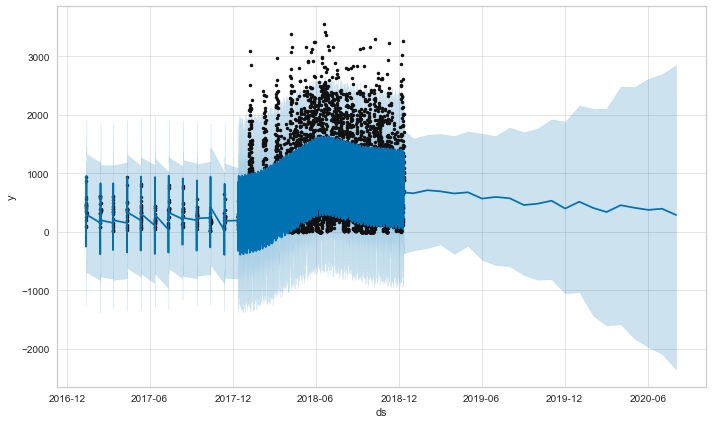

In [57]:
model.plot(forecast, uncertainty=True);

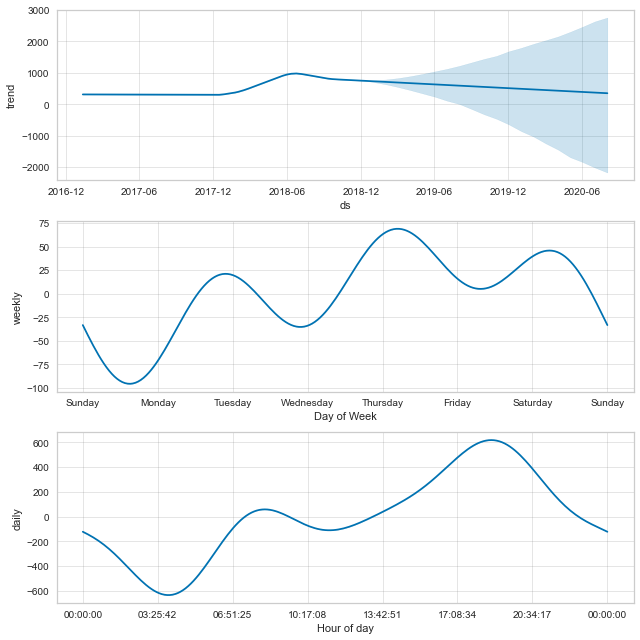

In [58]:
model.plot_components(forecast);

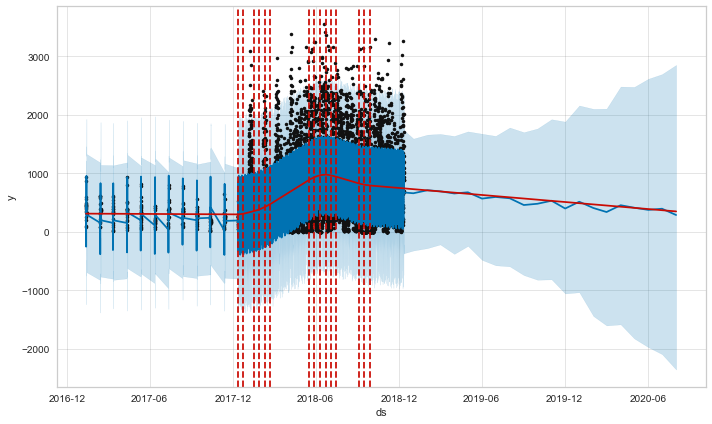

In [59]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [60]:
prophet_ap_df = pd.DataFrame(index=encoded_df.loc[7008:, "Timestamp"])
prophet_ap_df['Actual'] = encoded_df.iloc[7008:, -3].values
prophet_ap_df['Prediction'] = forecast.loc[5276:, 'yhat'].values
prophet_ap_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1752 entries, 2018-09-19 00:00:00 to 2018-11-30 23:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Actual      1752 non-null   int64  
 1   Prediction  1752 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 41.1 KB


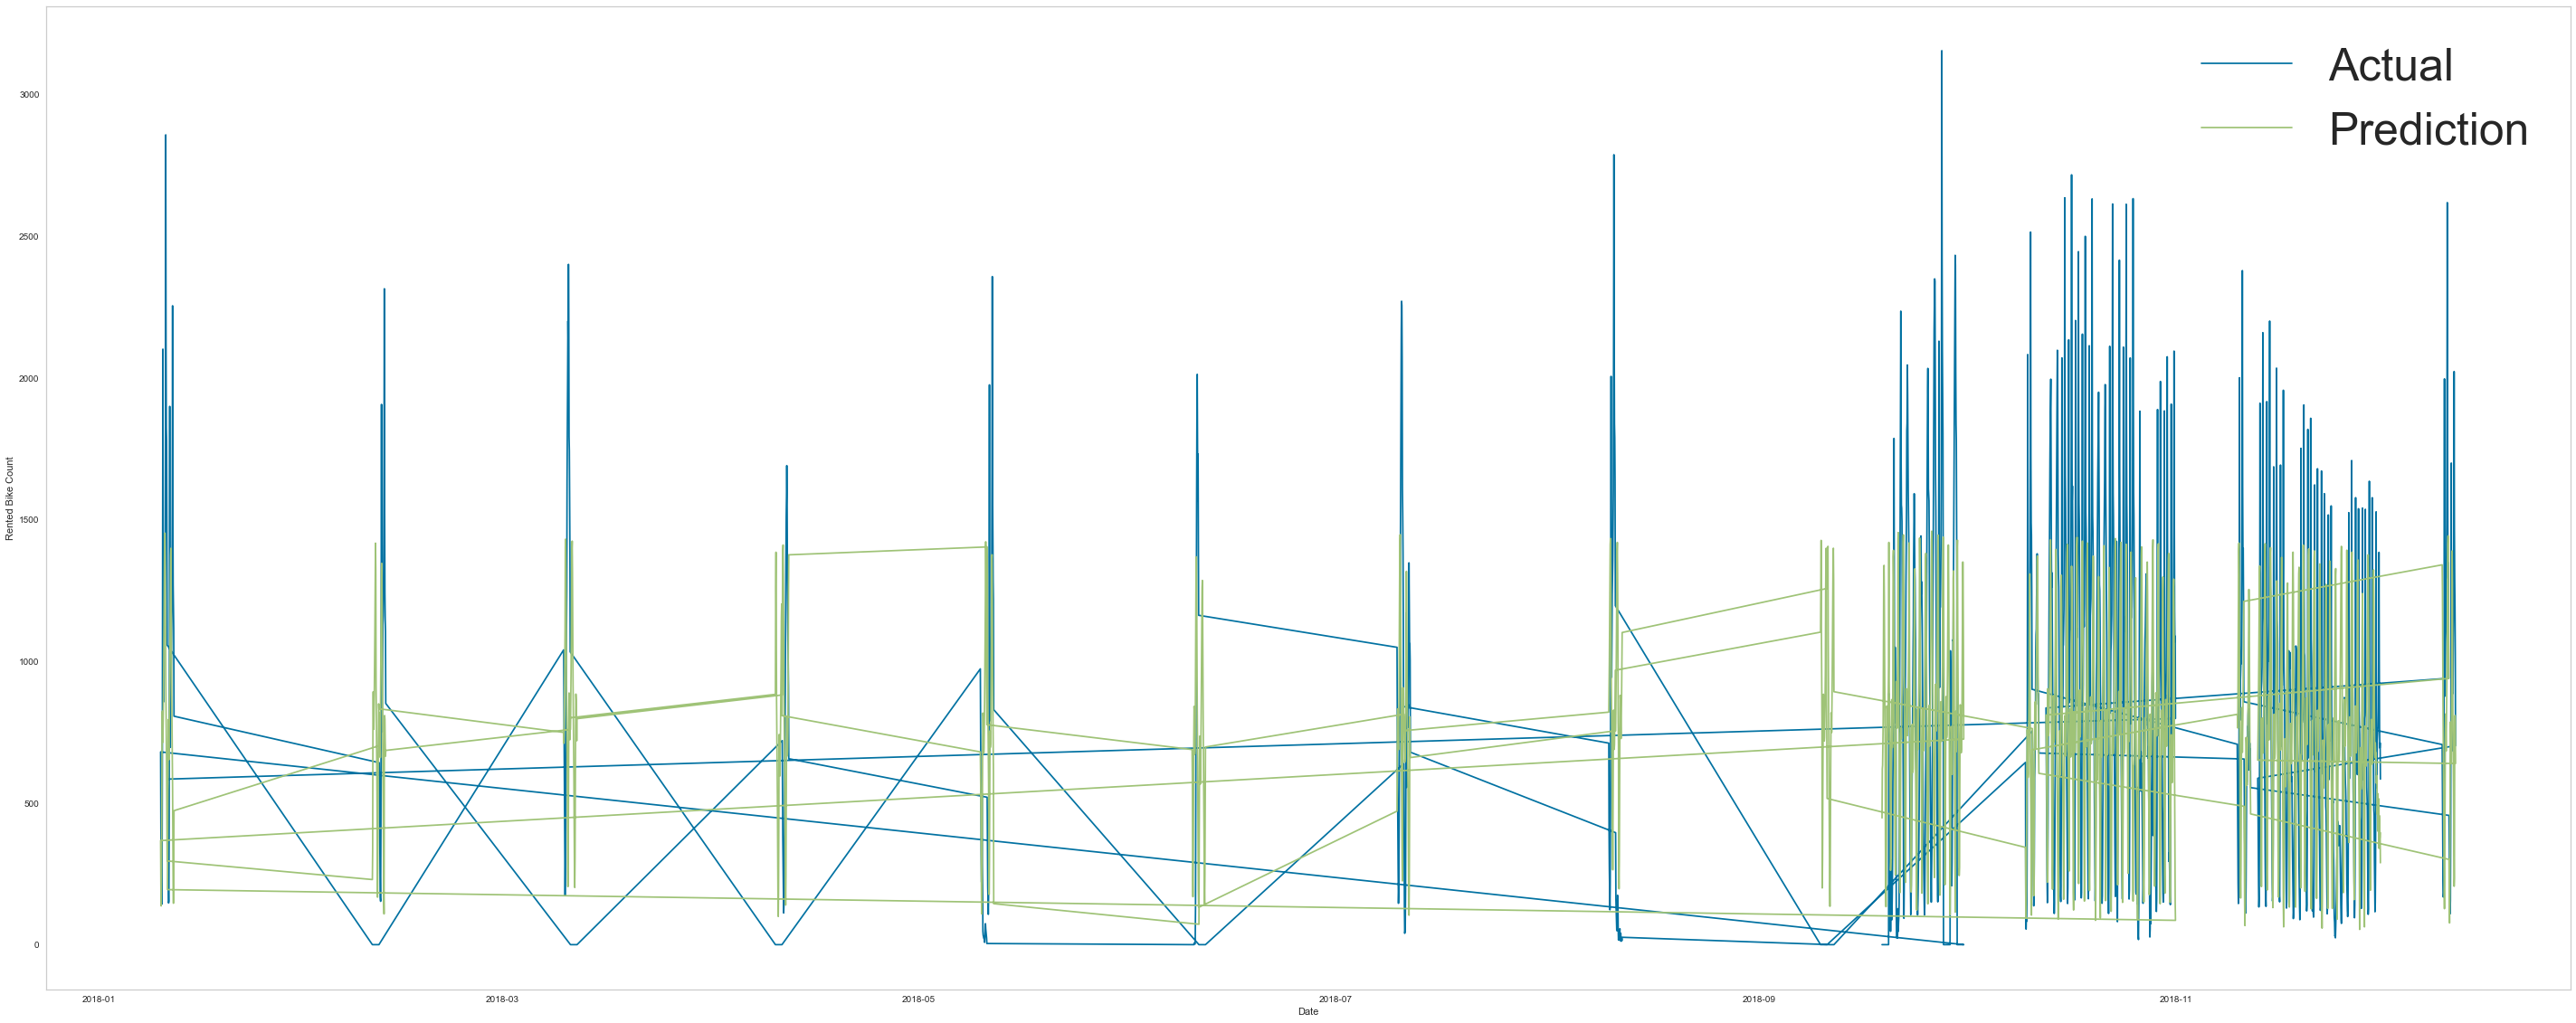

In [61]:
plt.figure(figsize=(50,20))
plt.plot(prophet_ap_df,label=['Actual','Prediction'])
plt.xlabel("Date")
plt.ylabel("Rented Bike Count")
plt.legend(fontsize=50)
plt.grid(False)

In [62]:
prophet_ap_df.index=prophet_ap_df.index.strftime('%d/%m/%Y, %r')
prophet_ap_df

Actual  Prediction
Timestamp                                  
19/09/2018, 12:00:00 AM       0  447.163685
19/09/2018, 01:00:00 AM       0  620.296946
19/09/2018, 02:00:00 AM       0  633.377791
19/09/2018, 03:00:00 AM       0  700.261267
19/09/2018, 04:00:00 AM       0  786.216242
...                         ...         ...
30/11/2018, 07:00:00 PM    1003  455.928825
30/11/2018, 08:00:00 PM     764  413.091362
30/11/2018, 09:00:00 PM     694  376.156695
30/11/2018, 10:00:00 PM     712  396.167130
30/11/2018, 11:00:00 PM     584  288.886597

[1752 rows x 2 columns]

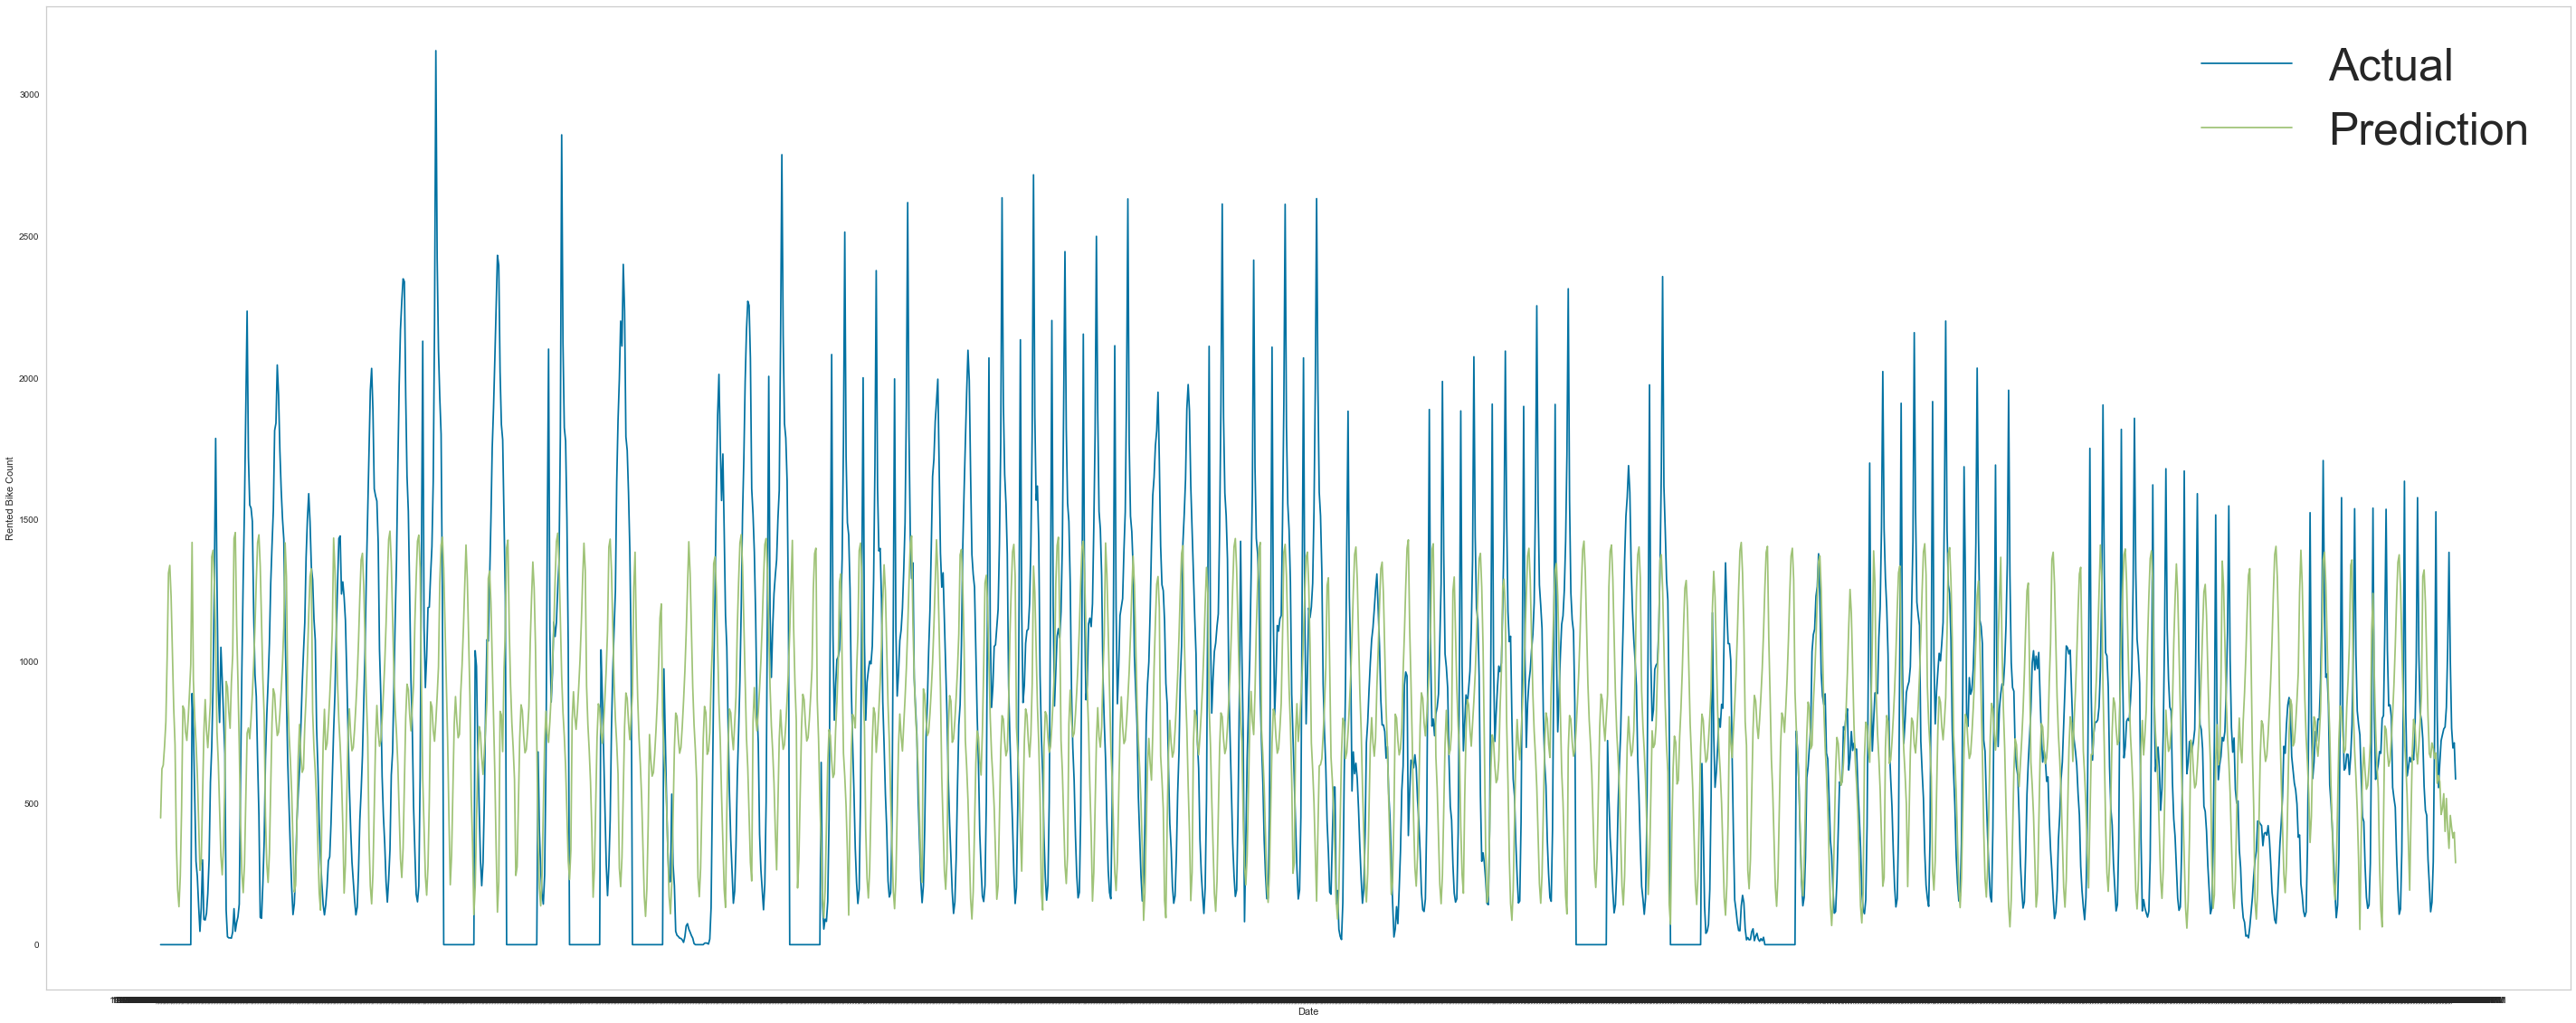

In [63]:
plt.figure(figsize=(50,20))
plt.plot(prophet_ap_df,label=['Actual','Prediction'])
plt.xlabel("Date")
plt.ylabel("Rented Bike Count")
plt.legend(fontsize=50)
plt.grid(False)

In [64]:
mse_Prophet = mean_squared_error(prophet_ap_df['Prediction'],prophet_ap_df['Actual'])
mae_Prophet = mean_absolute_error(prophet_ap_df['Prediction'],prophet_ap_df['Actual'])
mape_Prophet = mean_absolute_percentage_error(prophet_ap_df['Prediction'],prophet_ap_df['Actual'])
r2_Prophet = r2_score(prophet_ap_df['Prediction'],prophet_ap_df['Actual'])
print("The Mean Square Error for Prophet Model is ",round(mse_Prophet,4))
print("The Mean Absolute Error for Prophet Model is ",round(mae_Prophet,4))
print("The Mean Absolute Percentage Error for Prophet Model is ",round(mape_Prophet,4))
print("The R2 score for Prophet model is",round(r2_Prophet,4))

The Mean Square Error for Prophet Model is  511300.6998
The Mean Absolute Error for Prophet Model is  580.1104
The Mean Absolute Percentage Error for Prophet Model is  1.1013
The R2 score for Prophet model is -3.3763


## Add seasonality to model

In [65]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)

In [66]:
model_season.fit(train_data)

10:41:03 - cmdstanpy - INFO - Chain [1] start processing
10:41:04 - cmdstanpy - INFO - Chain [1] done processing


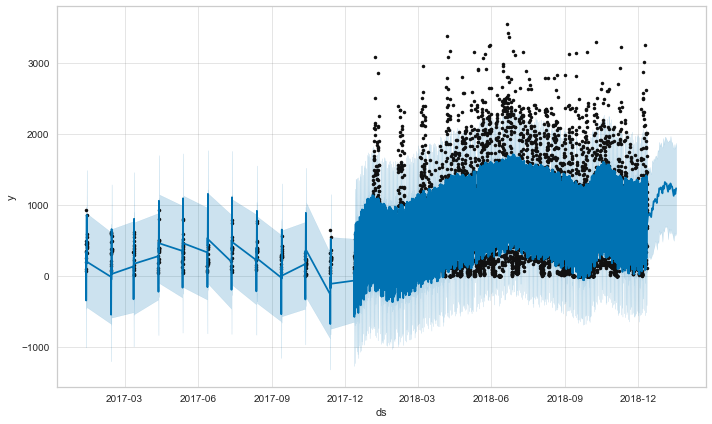

In [67]:
# Create the time range for the forecast
future_season = model_season.make_future_dataframe(periods=36)
# Make prediction
forecast_season = model_season.predict(future_season)
# Visualize the forecast
model_season.plot(forecast_season);

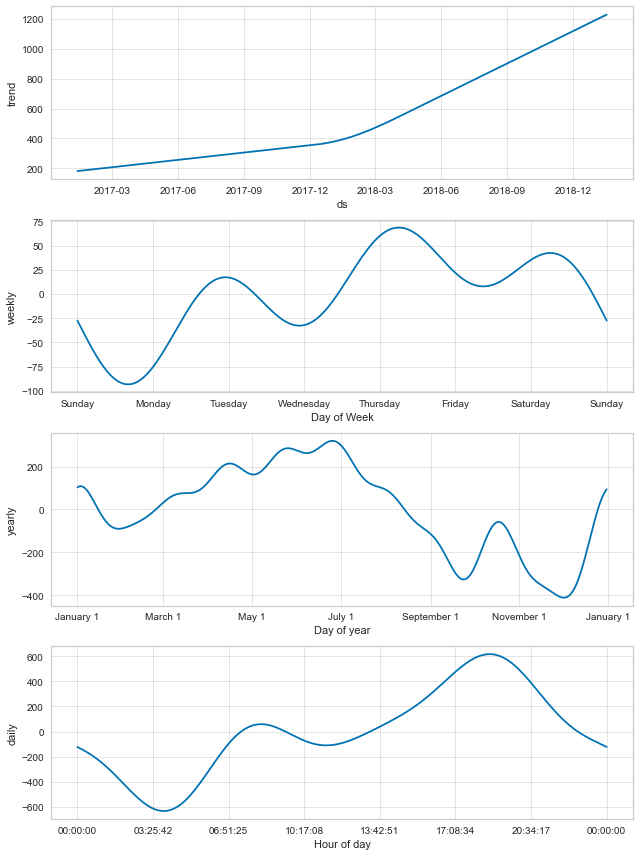

In [68]:
model_season.plot_components(forecast_season);

# Long Short Term Memory Network (LSTM)

## Import LSTM libraries

In [69]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

## Data preparation for LSTM

In [70]:
#Train Test split before LSTM (80% Train 20% Test)
train_LSTM = encoded_df.iloc[:7008,-3].values   
test_LSTM = encoded_df.iloc[7008:,-3].values

In [71]:
train_LSTM=np.reshape(train_LSTM,(7008,1))
test_LSTM=np.reshape(test_LSTM,(1752,1))

In [72]:
#Standardize data between 0 and 1
sc = MinMaxScaler()
train_LSTM_scaled = sc.fit_transform(train_LSTM)
test_LSTM_scaled = sc.transform (test_LSTM)

In [73]:
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]

#50 steps for one input(1 value) for train set
for i in range(50, len(train_LSTM_scaled)):
    X_train.append(train_LSTM_scaled[i-50:i,0])
    Y_train.append(train_LSTM_scaled[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

#using final 50 steps from train set to predict output on testing
test_LSTM_scaled_50=np.vstack((train_LSTM_scaled[-50:],test_LSTM_scaled))

#50 steps for one input(1 value) for test set
for i in range(50, len(test_LSTM_scaled_50)):
    X_test.append(test_LSTM_scaled_50[i-50:i,0])
    Y_test.append(test_LSTM_scaled_50[i,0])
X_test, Y_test = np.array(X_test), np.array(Y_test)

In [74]:
LSTM_regression = Sequential() #initialising model

In [75]:
# Add first layer of neural network
# units: number of neurons in hidden layer - put 100 neurons into it
# activation: activation function to be used, Sigmoid or tanh
# input shape: data shape to be provide for LSTM RNN
# fix dropout rate at 20%
LSTM_regression.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
LSTM_regression.add(Dropout(0.2))

In [76]:
# Add second layer of neural network similar to first layer
LSTM_regression.add(LSTM(units=100, return_sequences=True)) 
LSTM_regression.add(Dropout(0.2))

In [77]:
# Add Final Layer before output similar to first layer
LSTM_regression.add(LSTM(units=100))
LSTM_regression.add(Dropout(0.2))

In [78]:
# Output layer
LSTM_regression.add(Dense(units=1))

In [79]:
LSTM_regression.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

## Compile LSTM Layer Model

In [80]:
LSTM_regression.compile(optimizer="adam", loss="mean_squared_error")

In [81]:
#fitting RNN to training set
history= LSTM_regression.fit(X_train, Y_train, validation_split=0.2,epochs=50,batch_size=64)

Epoch 1/50
87/87 [==============================] - 35s 312ms/step - loss: 0.0205 - val_loss: 0.0239
Epoch 2/50
87/87 [==============================] - 27s 314ms/step - loss: 0.0123 - val_loss: 0.0192
Epoch 3/50
87/87 [==============================] - 26s 295ms/step - loss: 0.0102 - val_loss: 0.0151
Epoch 4/50
87/87 [==============================] - 25s 288ms/step - loss: 0.0086 - val_loss: 0.0137
Epoch 5/50
87/87 [==============================] - 26s 295ms/step - loss: 0.0077 - val_loss: 0.0103
Epoch 6/50
87/87 [==============================] - 25s 286ms/step - loss: 0.0064 - val_loss: 0.0090
Epoch 7/50
87/87 [==============================] - 34s 391ms/step - loss: 0.0059 - val_loss: 0.0079
Epoch 8/50
87/87 [==============================] - 26s 296ms/step - loss: 0.0056 - val_loss: 0.0074
Epoch 9/50
87/87 [==============================] - 23s 266ms/step - loss: 0.0053 - val_loss: 0.0067
Epoch 10/50
87/87 [==============================] - 29s 335ms/step - loss: 0.0047 - val_lo

In [82]:
#save model for loading later
LSTM_regression.save("LSTM_univariate.h5")

## Making Prediction & data visualization

In [83]:
#saving loss and val loss for plotting to check whether underfit or overfit
LSTM_univariate = history.history

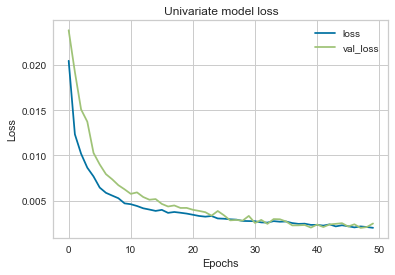

In [84]:
#Plotting loss and val loss
plt.plot(LSTM_univariate['loss'], label='loss')
plt.plot(LSTM_univariate['val_loss'],label="val_loss")
plt.title ("Univariate model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [85]:
#Find predictions and inverse transform for plotting
prediction = LSTM_regression.predict(X_test)
#multivariance 
#prediction_combined=np.concarenate((Test_set_scaled[50:,0:4],prediction),axis=1)
prediction_inverse=sc.inverse_transform(prediction)

55/55 [==============================] - 6s 61ms/step


In [86]:
#Combine actual and prediction as DF for plot

actual_predict_df=pd.DataFrame(index=encoded_df.loc[7008:,"Timestamp"])
actual_predict_df["Actual"] = encoded_df.iloc[7008:,-3].values
actual_predict_df["Prediction"]=prediction_inverse
actual_predict_df

Actual   Prediction
Timestamp                               
2018-09-19 00:00:00       0    66.047974
2018-09-19 01:00:00       0    56.478355
2018-09-19 02:00:00       0    43.967258
2018-09-19 03:00:00       0    26.138977
2018-09-19 04:00:00       0     9.353005
...                     ...          ...
2018-11-30 19:00:00    1003  1270.016724
2018-11-30 20:00:00     764   912.866028
2018-11-30 21:00:00     694   762.929749
2018-11-30 22:00:00     712   610.539124
2018-11-30 23:00:00     584   551.867065

[1752 rows x 2 columns]

In [87]:
actual_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1752 entries, 2018-09-19 00:00:00 to 2018-11-30 23:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Actual      1752 non-null   int64  
 1   Prediction  1752 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 34.2 KB


In [88]:
actual_predict_df.index=actual_predict_df.index.strftime('%d/%m/%Y, %r')
actual_predict_df

Actual   Prediction
Timestamp                                   
19/09/2018, 12:00:00 AM       0    66.047974
19/09/2018, 01:00:00 AM       0    56.478355
19/09/2018, 02:00:00 AM       0    43.967258
19/09/2018, 03:00:00 AM       0    26.138977
19/09/2018, 04:00:00 AM       0     9.353005
...                         ...          ...
30/11/2018, 07:00:00 PM    1003  1270.016724
30/11/2018, 08:00:00 PM     764   912.866028
30/11/2018, 09:00:00 PM     694   762.929749
30/11/2018, 10:00:00 PM     712   610.539124
30/11/2018, 11:00:00 PM     584   551.867065

[1752 rows x 2 columns]

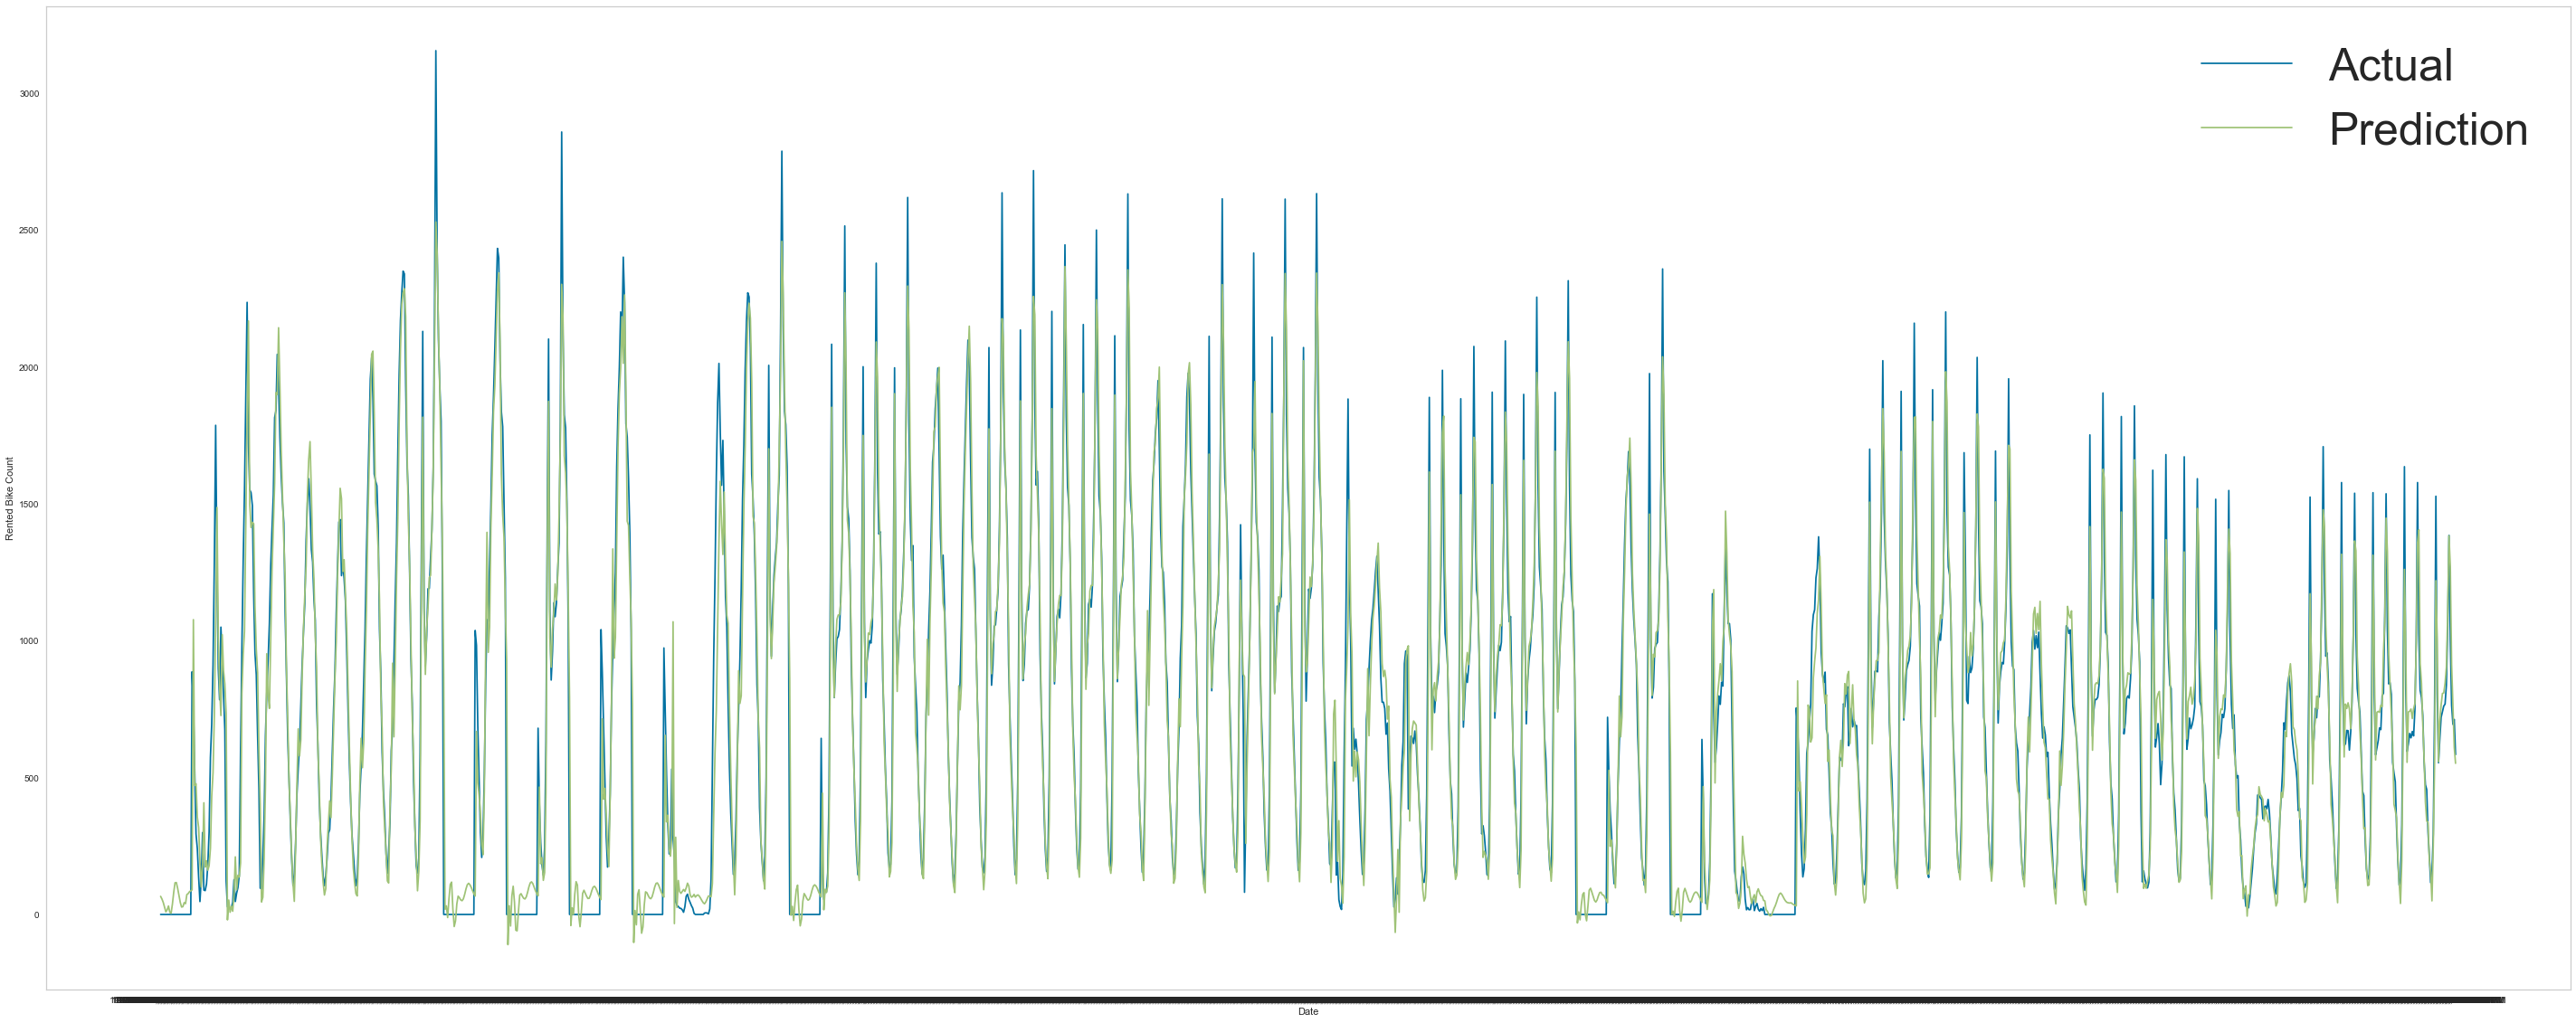

In [89]:
#Plot Prediction with actual value
plt.figure(figsize=(50,20))
plt.plot(actual_predict_df,label=['Actual','Prediction'])
plt.xlabel("Date")
plt.ylabel("Rented Bike Count")
plt.legend(fontsize=50)
plt.grid(False)

In [90]:
mse_LSTM = mean_squared_error(prediction,Y_test)
mae_LSTM = mean_absolute_error(prediction,Y_test)
mape_LSTM = mean_absolute_percentage_error(prediction,Y_test)
r2_LSTM = r2_score(prediction, Y_test)
print("The Mean Square Error for LSTM Model is ",round(mse_LSTM,4))
print("The Mean Absolute Error for LSTM Model is ",round(mae_LSTM,4))
print("The Mean Absolute Percentage Error for LSTM Model is ",round(mape_LSTM,4))
print("The R2 score for LSTM model is",round(r2_LSTM,4))

The Mean Square Error for LSTM Model is  0.0021
The Mean Absolute Error for LSTM Model is  0.0296
The Mean Absolute Percentage Error for LSTM Model is  0.4048
The R2 score for LSTM model is 0.9244
